In [4]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



In [25]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and direc

In [ ]:
# Raw Data loading
# seoul_df = pd.read_csv('./data/seoul.csv', encoding='cp949', skiprows=7)
means_df = pd.read_csv("/content/drive/MyDrive/[AI 웹서비스 스쿨]/[머신러닝]/data/project1/means.csv", encoding="euc-kr", sep=',', index_col=None)
means_df.columns = ['순위', '지점', '인구', '비율']

display(means_df.head(5), means_df.shape)


,순위,지점,인구,비율
0,1,기타항구,4283.0,0.4
1,2,제주항구,36.0,0.0
2,3,인천항구,73.0,0.0
3,4,부산항구,5760.0,0.6
4,5,기타공항,71581.0,7.5


(9, 4)

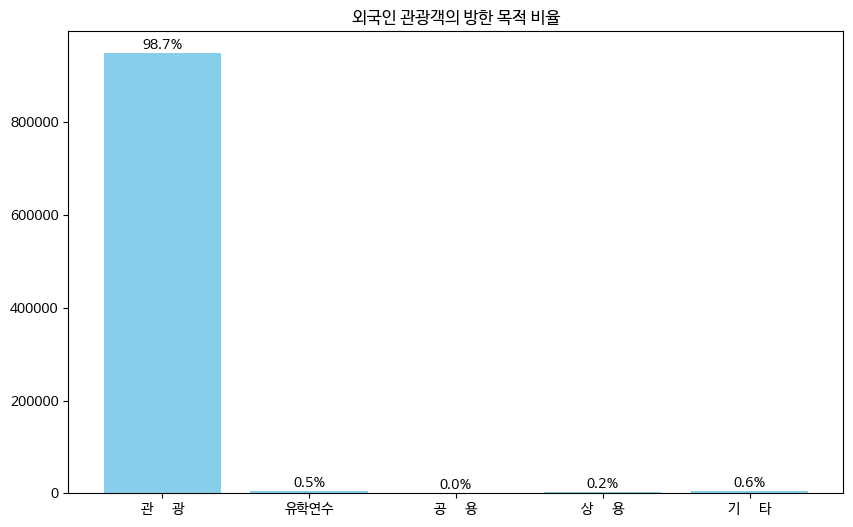

In [ ]:
# Raw Data loading

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 데이터 로드
goal_df = pd.read_csv("/content/drive/MyDrive/[AI 웹서비스 스쿨]/[머신러닝]/data/project1/goal.csv", encoding="euc-kr", sep=',', index_col=None)
goal_df.columns = ['구분','방한외래관광객', '비율']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(goal_df["구분"], goal_df["방한외래관광객"], color='skyblue')

# 각 막대 위에 비율 값 표시
for bar, 비율 in zip(bars, goal_df["비율"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{비율}%',
             ha='center', va='bottom', fontsize=10)

# 제목 및 레이블 설정
plt.title("외국인 관광객의 방한 목적 비율")
plt.show()


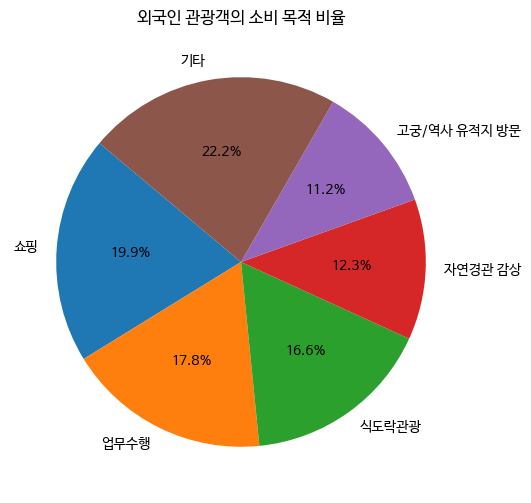

In [ ]:
# import matplotlib.pyplot as plt

# plt.rc('font', family='NanumBarunGothic')

# 데이터 생성
consumption_data = {
    "카테고리": ["쇼핑", "업무수행", "식도락관광", "자연경관 감상", "고궁/역사 유적지 방문", "기타"],
    "비율 (%)": [19.9, 17.8, 16.6, 12.3, 11.2, 22.2]
}

# 데이터프레임으로 변환
consumption_df = pd.DataFrame(consumption_data)


plt.figure(figsize=(8, 6))
plt.pie(consumption_df["비율 (%)"], labels=consumption_df["카테고리"], autopct="%1.1f%%", startangle=140)
plt.title("외국인 관광객의 소비 목적 비율")
plt.show()


In [5]:
# Raw Data loading
df = pd.read_csv("/content/drive/MyDrive/[AI 웹서비스 스쿨]/[머신러닝]/data/project1/외래관광객조사_2023_데이터.txt", encoding="euc-kr", delimiter = '\t',low_memory=False)
# df.columns = ['순위', '지점', '인구', '비율']

display(df.head(5), df.shape)

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,1,2.0,3.0,4.0,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.099893
1,7.0,20.0,4.0,5.0,1,2,2.0,9.0,7.0,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.333757
2,8.0,2.0,2.0,5.0,1,5,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.838755
3,10.0,1.0,1.0,NaN,1,3,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.272342
4,11.0,3.0,3.0,5.0,1,2,8.0,3.0,7.0,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.434506


(16196, 365)

In [6]:
# 항목 별 값 조회
columns_value_df= pd.read_excel('/content/drive/MyDrive/[AI 웹서비스 스쿨]/[머신러닝]/data/project1/외래관광객조사_2023_항목정의서.xlsx', sheet_name=1)
# display(columns_value_df.head(5))

indices = columns_value_df[columns_value_df['항목ID'].notnull()].index.tolist()

# 구간 별 동일값 설정
for i in range(len(indices)):
    # index 설정
    start_idx = indices[i]
    end_idx = indices[i + 1] if i + 1 < len(indices) else len(columns_value_df)

    # 각 구간에 동일한 값 설정
    columns_value_df.loc[start_idx:end_idx-1, '항목ID'] = columns_value_df.loc[start_idx, '항목ID']
    columns_value_df.loc[start_idx:end_idx-1, '항목명'] = columns_value_df.loc[start_idx, '항목명']
    columns_value_df.loc[start_idx:end_idx-1, '변수명'] = columns_value_df.loc[start_idx, '변수명']

display(columns_value_df)

,항목ID,항목명,변수명,코드값,코드명,비고
0,3.0,한국 방문횟수(카테고리),RVIT,1,1회,NaN
1,3.0,한국 방문횟수(카테고리),RVIT,2,2회,NaN
2,3.0,한국 방문횟수(카테고리),RVIT,3,3회,NaN
3,3.0,한국 방문횟수(카테고리),RVIT,4,4회 이상,NaN
4,3.0,한국 방문횟수(카테고리),RVIT,5,재방문,NaN
...,...,...,...,...,...,...
6384,363.0,방한횟수별,D_NUM,3,3회,NaN
6385,363.0,방한횟수별,D_NUM,4,4회 이상,NaN
6386,364.0,여행형태별,D_GUB,1,개별여행,분석변수
6387,364.0,여행형태별,D_GUB,2,AIR-TEL,NaN


In [7]:
df.fillna(-1, inplace=True)

In [8]:
# 대만 방한 여행객 데이터
Taiwan_df = df[df['D_NAT'] == 3]
# Taiwan_df.info()
# print(Taiwan_df.shape) # row: 1263, col: 365

pd.set_option('display.max_columns', 274)  # 모든 열을 출력하도록 설정
pd.set_option("display.max_rows", 274)     # 모든 행을 출력하도록 설정

display(Taiwan_df.head(3))

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,Q2a2,Q2a3,Q2a_dk,Q2_1a1,Q2_1a2,Q2_1a3,Q3_1a1,Q3_1a2,Q3_1a3,Q3_2a1,Q3_2a2,Q3_2a3,Q4a1,Q4a2,Q4a3,Q4a_dk,Q4_1a1,Q4_1a2,Q4_1a3,Q4_2a1,Q4_2a2,Q4_2a3,Q4_2a_dk,Q5,Q5_1a01,Q5_1a02,Q5_1a03,Q5_1a04,Q5_1a05,Q5_1a06,Q5_1a07,Q5_1a08,Q5_1a09,Q5_1a10,Q5_1a99,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,Q7a8,MQ7_1,MQ7_1제외,MQ7_2,MQ7_1$15제외,MQ7_1제외$15제외,RQ7_1,RQ7_1제외,RQ7_2,RQ7_1$15제외,RQ7_1제외$15제외,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a08,Q8a09,Q8a10,Q8a11,Q8a12,Q8a13,Q8a14,Q8a15,Q8a16,Q8a17,Q8a18,Q8a19,Q8_1a1,Q8_1a2,Q8_1a3,Q9_1_1,Q9_1_2,Q9_1_3,Q9_1_4,Q9_1_5,Q9_2a01,Q9_2a02,Q9_2a03,Q9_2a04,Q9_2a05,Q9_2a06,Q9_2a07,Q9_2a08,Q9_2a09,Q9_2a10,Q9_2a11,Q9_2a12,Q9_2a13,Q9_2a14,Q9_2a15,Q9_2a16,Q9_2a17,KWON1,KWON2,KWON3,KWON4,KWON5,KWON6,KWON7,KWON8,KWONA1,KWONA2,KWONA3,KWONB1,KWONB2,M박HAP,M일HAP,M일HAP_61,R1일HAP,서울박TOT,경기박TOT,인천박TOT,강원박TOT,대전박TOT,충북박TOT,충남박TOT,세종박TOT,경북박TOT,경남박TOT,대구박TOT,울산박TOT,...,MDAY전체TOT_RAW61,MDAY전체_개별국제교통비제외,MDAY전체TOT_RAW61항공제외2,RDAY전체,RDAY전체TOT_RAW2,RDAY전체TOT_RAW61,RDAY전체_개별국제교통비제외,RDAY전체TOT_RAW61항공제외2,MDAY개별대체,MDAY에어대체,MDAY단체대체,MDAY개별61대체,MDAY에어61대체,MDAY단체61대체,MDAY개별61항공제외대체,MDAY에어61항공제외대체,MDAY단체61항공제외대체,RDAY개별대체,RDAY에어대체,RDAY단체대체,RDAY개별61대체,RDAY에어61대체,RDAY단체61대체,RDAY개별61항공제외대체,RDAY에어61항공제외대체,RDAY단체61항공제외대체,여행사1인대체,가이드1인대체,숙박비1인대체,음식점1인대체,식음료1인대체,국제한국1인대체,국제국외1인대체,국제수상1인대체,한국한국1인대체,한국국외1인대체,한국수상1인대체,한국철도1인대체,한국도로1인대체,대여서1인대체,유류비1인대체,문화서1인대체,오락및1인대체,쇼핑비1인대체,데이터1인대체,치료및1인대체,미용서1인대체,기타비1인대체,C여행사1인대체,C가이드1인대체,C숙박비1인대체,C음식점1인대체,C식음료1인대체,C국제한국1인대체,C국제국외1인대체,C국제수상1인대체,C한국한국1인대체,C한국국외1인대체,C한국수상1인대체,C한국철도1인대체,C한국도로1인대체,C대여서1인대체,C유류비1인대체,C문화서1인대체,C오락및1인대체,C쇼핑비1인대체,C데이터1인대체,C치료및1인대체,C미용서1인대체,C기타비1인대체,Q10_2a01,Q10_2a02,Q10_2a03,Q10_2a04,Q10_2a05,Q10_2a06,Q10_2a07,Q10_2a08,Q10_2a09,Q10_2a10,Q10_2a11,Q10_2a12,Q10_2a13,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,MQ10_2b07,MQ10_2b08,MQ10_2b09,MQ10_2b10,MQ10_2b11,MQ10_2b12,MQ10_2b13,Q10_3a1,Q10_3a2,Q10_3a3,Q11,Q12a01,Q12a02,Q12a03,Q12a04,Q12a05,Q12a06,Q12a07,Q12a08,Q12a09,Q12a10,Q12a11,Q12a12,Q12a13,Q12a14,Q12a15,Q12a16,Q12a17,Q12a18,Q12a19,Q12a20,Q12a21,Q12a22,Q12a23,Q12a24,Q12a25,Q12a26,Q13,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,1,2.0,3.0,4.0,4.0,8.0,2.0,-1.0,2.0,-1.0,-1.0,1.0,7.0,2.0,6.0,10.0,2.0,1.0,4.0,7.0,-1.0,2.0,5.0,6.0,8.0,6.0,-1.0,-1.0,2,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8,1.0,2.0,11040.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,1.0,2.0,26.0,27.0,27.0,4.0,24.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,60.51,40.49,40.49,2.0,2.0,2.0,1.0,1.0,60.51,-1.0,-1.0,60.51,-1.0,-1.0,40.49,-1.0,-1.0,2.0,-1.0,-1.0,2.0,-1.0,-1.0,1.0,-1.0,-1.0,0.0,0.0,123.53,308.82,46.32,540.43,0.0,0.0,0.0,0.0,0.0,54.04,77.2,0.0,0.0,23.16,0.0,386.02,20.07,54.04,0.0,0.0,1.0,1.0,3.0,4.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,2.0,1.0,4.0,2.0,3.0,1.0,1.0,1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,40.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,-1.0,5,5.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5,5,5,5,5,5,5,5,5,5,-1.0,5,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.099893
9,20.0,1.0,1.0,-1.0,1,1,7.0,1.0,9.0,1.0,6.0,5.0,-1.0,5.0,4.0,10.0,7.0,2.0,1.0,10.0,6.0,2.0,1.0,3.0,4.0,-1.0,2.0,1.0,5.0,2.0,1.0,-1.0,-1.0,3,1.0,2.0,3.0,4.0,5.0,-1.0,-1.0,8.0,9.0,-1.0,-1,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.0,-1.0,-1.0,2.0,1.0,0.0,2.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,2.0,3.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2,3.0,1.0,42001.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,1.0,2.0,7.0,8.0,8.0,3.0,7.0,-1.0,-1.0,0

In [9]:
# 시각화 처리를 위한 값 대체

mapping_dict = {col: columns_value_df[columns_value_df['변수명'] == col].set_index('코드값')['코드명'].to_dict()
                for col in columns_value_df['변수명'].unique()}
# 매핑 딕셔너리를 사용해 각 열에 대해 매핑 적용
for col, mapping in mapping_dict.items():
    if col in Taiwan_df.columns:
        Taiwan_df.loc[:, col] = Taiwan_df[col].map(mapping).fillna(Taiwan_df[col])

<ipython-input-9-9a9b94072cdb>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4회 이상' '1회' '3회' ... '1회' '1회' '4회 이상']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Taiwan_df.loc[:, col] = Taiwan_df[col].map(mapping).fillna(Taiwan_df[col])
<ipython-input-9-9a9b94072cdb>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['재방문' -1.0 '재방문' ... -1.0 -1.0 '재방문']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Taiwan_df.loc[:, col] = Taiwan_df[col].map(mapping).fillna(Taiwan_df[col])
<ipython-input-9-9a9b94072cdb>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['개별여행' '개별여행' '개별여행' ... '단체여행(package tour)' '단체여행(package tour)'
 '단체여행(package tour)']' has dtype incompatible with int64, pl

In [10]:
# 방한하는 나이, 성별, 연령대 분석

# 성별, 연령, 목적, 방한 횟수, 그외 ...
info_df = Taiwan_df[['D_SEX', 'D_AGE', 'D_MOK', 'D_NUM', 'Q1_1a1', 'Q1_1a2', 'Q1_1a3', 'Q2a1', 'Q2a2', 'Q2a3', 'Q2a_dk', 'Q2_1a1', 'Q2_1a2', 'Q2_1a3', 'Q3_1a1', 'Q3_1a2', 'Q3_1a3', 'Q3_2a1', 'Q3_2a2', 'Q3_2a3', 'Q4a1', 'Q4a2', 'Q4a3', 'Q4a_dk', 'Q4_1a1', 'Q4_1a2', 'Q4_1a3', 'Q4_2a1', 'Q4_2a2', 'Q4_2a3', 'Q4_2a_dk'
]]

display(info_df[info_df['D_MOK'] == -1])

,D_SEX,D_AGE,D_MOK,D_NUM,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,Q2a2,Q2a3,Q2a_dk,Q2_1a1,Q2_1a2,Q2_1a3,Q3_1a1,Q3_1a2,Q3_1a3,Q3_2a1,Q3_2a2,Q3_2a3,Q4a1,Q4a2,Q4a3,Q4a_dk,Q4_1a1,Q4_1a2,Q4_1a3,Q4_2a1,Q4_2a2,Q4_2a3,Q4_2a_dk


In [11]:
print(info_df.loc[info_df['Q1_1a1'] != -1, ['Q1_1a1']].shape)
print(info_df.loc[info_df['Q1_1a2'] != -1, ['Q1_1a2']].shape)
print(info_df.loc[info_df['Q1_1a3'] != -1, ['Q1_1a3']].shape)

(1116, 1)
(923, 1)
(693, 1)


<Axes: xlabel='[문1-1. 한국여행 관심 계기_1순위]', ylabel='[명]'>

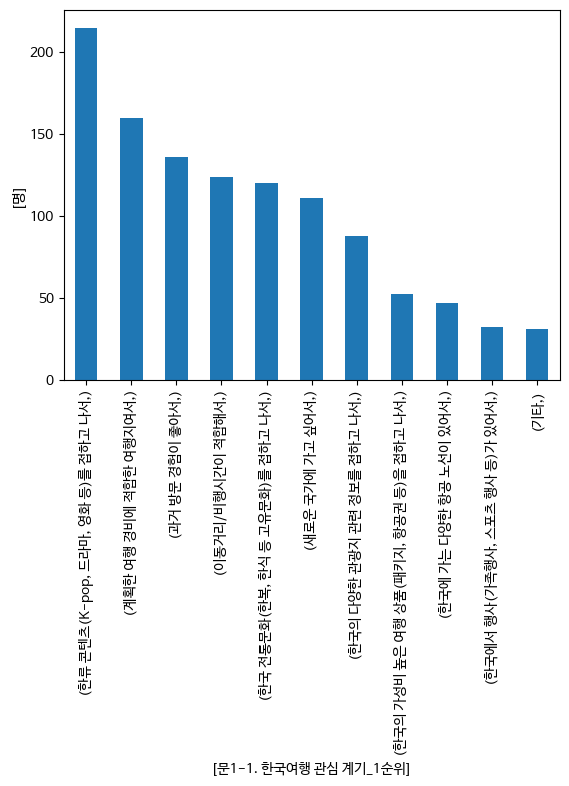

In [12]:
# 관심 계기 1순위 시각화
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

info_df.loc[info_df['Q1_1a1'] != -1, ['Q1_1a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q1_1a1', '항목명'].head(1).values
)

<Axes: xlabel='[문1-1. 한국여행 관심 계기_2순위]', ylabel='[명]'>

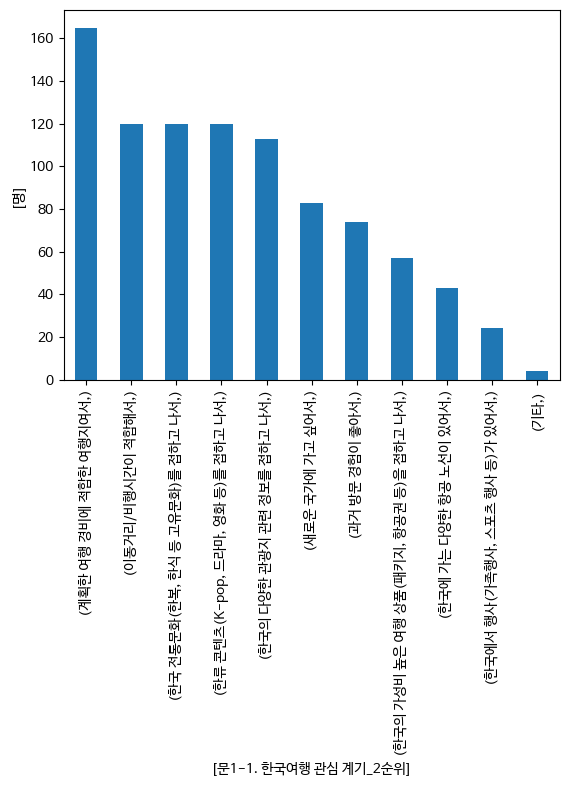

In [13]:
# 관심 계기 2순위 시각화
info_df.loc[info_df['Q1_1a2'] != -1, ['Q1_1a2']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q1_1a2', '항목명'].head(1).values
)

<Axes: xlabel='[문1-1. 한국여행 관심 계기_3순위]', ylabel='[명]'>

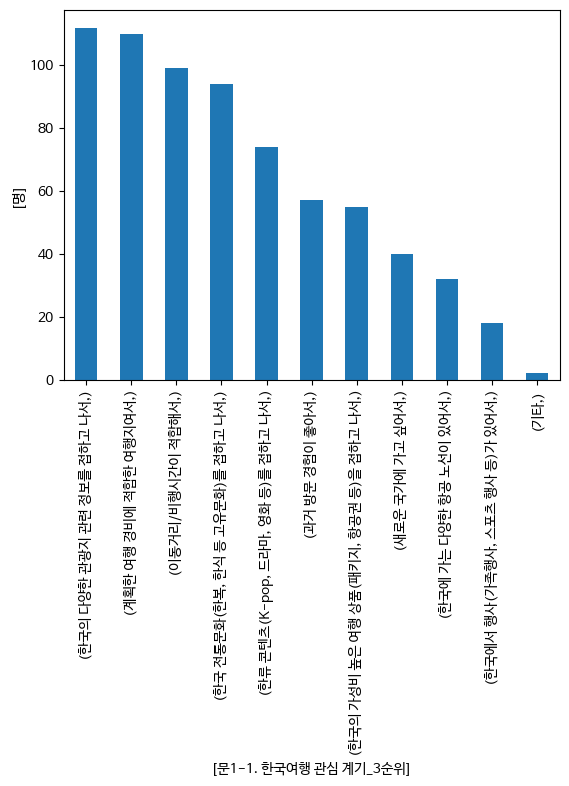

In [14]:
# 관심 계기 3순위 시각화
info_df.loc[info_df['Q1_1a3'] != -1, ['Q1_1a3']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q1_1a3', '항목명'].head(1).values
)